<a href="https://colab.research.google.com/github/HimanshuKakwani/Time-Series/blob/main/CNN_on_TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TSA/accidental-deaths-in-usa-monthly.csv')

In [ ]:
df.head()

,Month,Accidental deaths
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017


In [ ]:
df.shape

(72, 2)

In [ ]:
data = df['Accidental deaths']

In [ ]:
def getXY(sequence, steps):
    X, Y = list(), list()
    for start in range(len(sequence)):
        end = start + steps
        if end > len(sequence) - 1:
            break
        
        X.append(sequence[start:end])
        Y.append(sequence[end])
    
    return np.array(X), np.array(Y)

In [ ]:
steps = 3
X, Y = getXY(data, steps)
print(X[:5])
print(X[:5])

[[ 9007  8106  8928]
 [ 8106  8928  9137]
 [ 8928  9137 10017]
 [ 9137 10017 10826]
 [10017 10826 11317]]
[[ 9007  8106  8928]
 [ 8106  8928  9137]
 [ 8928  9137 10017]
 [ 9137 10017 10826]
 [10017 10826 11317]]


In [ ]:
features = 1
X = X.reshape(X.shape[0], X.shape[1], features)

In [ ]:
print(X[:5])

[[[ 9007]
  [ 8106]
  [ 8928]]

 [[ 8106]
  [ 8928]
  [ 9137]]

 [[ 8928]
  [ 9137]
  [10017]]

 [[ 9137]
  [10017]
  [10826]]

 [[10017]
  [10826]
  [11317]]]


In [ ]:
X_train, X_test = X[:-10], X[-10:]
Y_train, Y_test = Y[:-10], Y[-10:]

In [ ]:
model = Sequential([
        Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps, features)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(500, activation='relu'),
        Dense(100, activation='relu'),
        Dense(500, activation='relu'),
        Dense(1)
    ])

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 2, 64)             192       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 500)               32500     
                                                                 
 dense_13 (Dense)            (None, 100)               50100     
                                                                 
 dense_14 (Dense)            (None, 500)               50500     
                                                      

In [ ]:
h = model.fit(X_train, Y_train, epochs=1000, verbose=0)

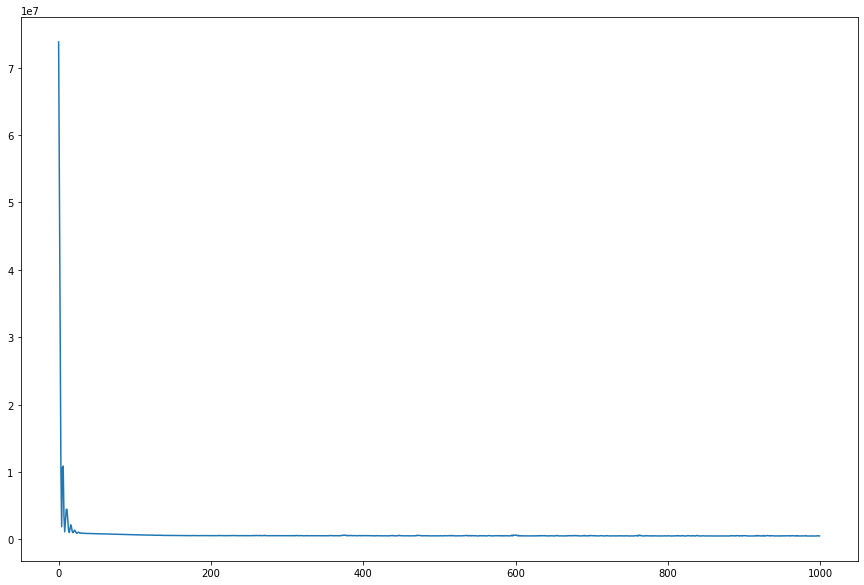

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(h.history['loss'])
plt.show()

In [ ]:
Y_pred = model.predict(X_test)

1/1 [==============================] - 0s 77ms/step


In [ ]:
print(Y_test)

[ 7791  8129  9115  9434 10484  9827  9110  9070  8633  9240]


In [ ]:
print([i[0] for i in Y_pred])

[7266.404, 6774.2725, 8363.575, 9059.135, 9702.748, 10409.936, 9518.351, 9096.449, 8471.888, 8256.972]


In [ ]:
mse = [(a-b)**2 for a,b in zip(Y_train, Y_test)]
print(np.mean(mse))

1493046.7


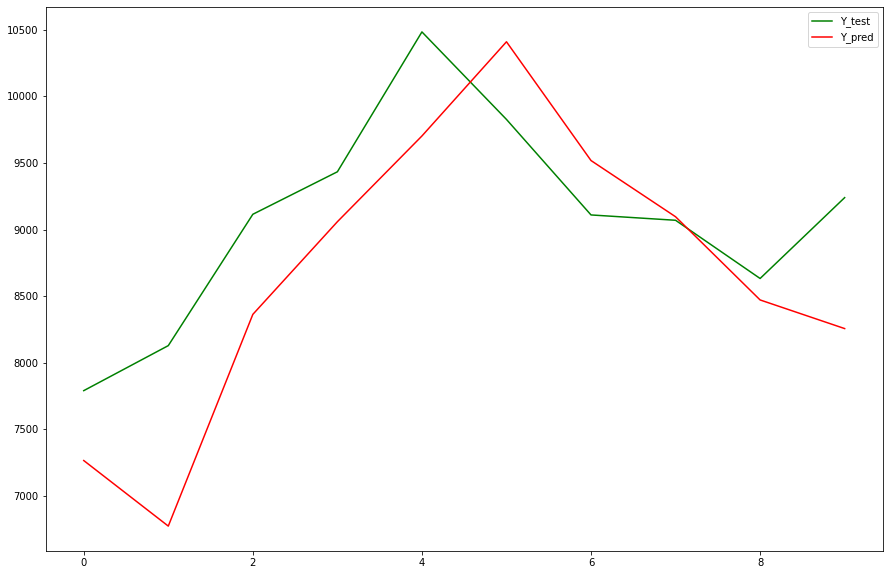

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(Y_test, color='g')
plt.plot(Y_pred, color='r')
plt.legend(['Y_test', 'Y_pred'])
plt.show()